#CNN-CIFAR10-KERAS-TF2.X

In [2]:
import tensorflow as tf
print(tf.__version__)
!python --version

2.12.0
Python 3.11.2


In [4]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.callbacks import EarlyStopping
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline

In [5]:
(X_train_, y_train), (X_test_, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
print('X_train shape:', X_train_.shape)
print('train samples: ',X_train_.shape[0])
print('test samples: ', X_test_.shape[0])

X_train shape: (50000, 32, 32, 3)
train samples:  50000
test samples:  10000


In [7]:
num_train, img_rows, img_cols, img_channels =  X_train_.shape

In [8]:
# image dimension:
input_shape = (img_rows, img_cols, 3)

In [9]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [10]:
n_classes = len(np.unique(y_train))
n_classes

10

In [11]:
classes = np.unique(y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Visualizing the classes with an image example

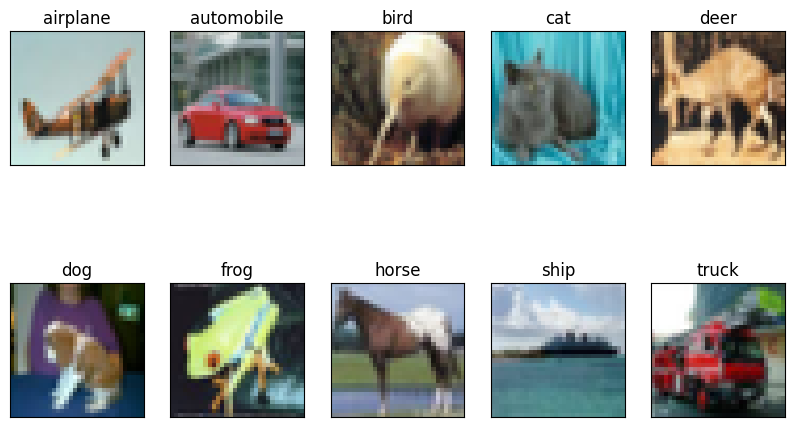

In [12]:
fig = plt.figure(figsize=(10,6))
for i in range(n_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train_[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    image = features_idx[img_num,::].reshape((32, 32, 3))
    ax.set_title(class_names[i])
    plt.imshow(image)
plt.show()

In [13]:
#Normalize the input data
X_train = X_train_.astype('float32')/255.
X_test = X_test_.astype('float32')/255.

In [14]:
#One-hot encode the labels
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

## CNN architecture

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32, kernel_size=(3, 3), input_shape= input_shape, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
model.add(Dropout(0.3))

In [17]:
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
model.add(Dropout(0.3))

In [18]:
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), padding='same'))
model.add(Dropout(0.5))

In [19]:
model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.50))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = n_classes, activation = 'softmax'))

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

## Compiling the model:

In [37]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [38]:
# Define a callback to prevent overfitting:
callbacks = [EarlyStopping(monitor='val_acc', patience=5)]
#monitor: quantity to be monitored
#patience: number of epochs with no improvement after which training will be stopped.

In [39]:
#hyperparameters
batch_size = 128
n_epochs = 5

In [40]:
results = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs,
          verbose=1, validation_data=(X_test, y_test),callbacks=callbacks)

Epoch 1/5
391/391 [==============================] - 346s 872ms/step - loss: 1.8313 - accuracy: 0.3756 - val_loss: 2.5151 - val_accuracy: 0.2588
Epoch 2/5
391/391 [==============================] - 322s 823ms/step - loss: 1.2417 - accuracy: 0.5526 - val_loss: 0.9785 - val_accuracy: 0.6501
Epoch 3/5
391/391 [==============================] - 312s 797ms/step - loss: 1.0229 - accuracy: 0.6370 - val_loss: 0.9653 - val_accuracy: 0.6647
Epoch 4/5
391/391 [==============================] - 307s 784ms/step - loss: 0.8961 - accuracy: 0.6837 - val_loss: 0.8618 - val_accuracy: 0.6999
Epoch 5/5
391/391 [==============================] - 293s 750ms/step - loss: 0.8199 - accuracy: 0.7119 - val_loss: 0.7365 - val_accuracy: 0.7416
